In [31]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
#Reading the processed data
df_new = pd.read_csv('Processed_features.csv')

In [35]:
# Removing 1st column as it contains index id (0,1,2,...,4186) [created due to printing of df into csv]
df_new = df_new.drop(df_new.columns[0],axis=1)

In [36]:
# Storing the 'Net New Money Details-YTD NNM \n(March-2018)' feature in a new variable and removing it from the dataset

y = df_new['Net New Money Details-YTD NNM \n(March-2018)']
X = df_new.drop('Net New Money Details-YTD NNM \n(March-2018)', axis = 1)

### _Deal with multicollinearity_

Multicollinearity is troublesome to detect because it emerges when three or more variables are highly correlated. It can emerge even when isolated pairs of variables are not collinear.

To deal with this issue, we will use the "VIF()" function which can detect multicollinearity.

In [37]:
# For each X, calculate VIF and save in dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [38]:
vif.sort_values(by=['VIF Factor'], ascending=False)

,VIF Factor,features
55,inf,Client Acquisition Details-$1M+ QNR's 2016
50,inf,Client Acquisition Details-QNR 2015
51,inf,Client Acquisition Details-QNR 2016
52,inf,Client Acquisition Details-QNR 2017
53,inf,Client Acquisition Details-3 year cumm. QNR
57,inf,Client Acquisition Details-3 year cumm. $1m+ QNR
56,inf,Client Acquisition Details-$1M+ QNR's 2017
54,9.007199e+15,Client Acquisition Details-$1M+ QNR's 2015
0,2.081035e+02,FA Details-I-LOS
1,1.427376e+02,FA Details-Rocket-LOS


There are many features with high variance inflation factor because they "explain" the same variance within this dataset. We will discard one of these variables before moving on to model building to prevent high multicollinearity. We will have to test VIF many times to properly remove these features. For simplicity, we will only print the final VIF at the end.

In [39]:
df_new = df_new.drop(['Client Acquisition Details-$1M+ QNR\'s 2015', 
                      'Client Acquisition Details-$1M+ QNR\'s 2016',
                      'Client Acquisition Details-QNR 2015',
                      'Client Acquisition Details-QNR 2016',
                      'Client Acquisition Details-QNR 2017',
                      'Client Acquisition Details-$1M+ QNR\'s 2017',
                      'Segment Index Score (All FA Score)-Client Acquisition Score', 
                      'Segment Index Score (All FA Score)-Marketing Score',
                      'Segment Index Score (All FA Score)-Banking Score',
                      'Segment Index Score (All FA Score)-Client Retention'], axis=1)

In [40]:
df_new = df_new.drop(['FA Details-I-LOS',
                      'FA Details-T12\n(Feb 2018)',
                      'FA Details-Rec. Council 2018_Not Given',
                      'FA Details-Rocket-LOS',
                      'FA Details-Rocket Lifecycle Stage_Recruits with >1 to <5 Yrs Left on EFL',
                      'FA Details-AuM YE 17'], axis=1)

In [41]:
df_new = df_new.drop(['Product Mix (Assets)-EQUITY',
                      'Product Mix (Rev)-Advisory %',
                      'Product Mix (Assets)-Wrap %',
                      'Banking and Lending-SBL: H/UHNW MHHs Approved CLs (#)'], axis=1)

In [42]:
df_new = df_new.drop(['Digital Tools-% of MHHs on OLS'], axis=1)

In [43]:
df_new = df_new.drop(['Net New Money Details-# of NNM Years +',
                      'Net New Money Details-Color_Orange',
                      'Net New Money Details-Color_Green'], axis=1)

In [44]:
df_new = df_new.drop(['FA Details-Production Quintile_5.0',
                      'FA Details-Production Quintile_4.0',
                      'FA Details-Production Quintile_3.0',
                      'FA Details-Production Quintile_2.0'], axis=1)

In [45]:
X_vif_2 = df_new.drop('Net New Money Details-YTD NNM \n(March-2018)', axis = 1)
# For each X, calculate VIF and save in dataframe
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(X_vif_2.values, i) for i in range(X_vif_2.shape[1])]
vif_2["features"] = X_vif_2.columns
vif_2.sort_values(by=['VIF Factor'], ascending=False)

,VIF Factor,features
72,14.234858,Client Age Distribution (% of MHHs by Age)-65-...
121,13.834150,Maketing Details-FA Web_1.0
71,11.673863,Client Age Distribution (% of MHHs by Age)-55-...
66,11.478011,Banking and Lending-SBL: H/UHNW MHHs Approved ...
73,11.041609,Client Age Distribution (% of MHHs by Age)-75+...
12,10.749348,Product Mix (Rev)-ADVISORY
43,10.073483,Client Acquisition Details-3 year cumm. QNR
56,8.871242,Wealth/Financial Planning -MHHs with a Plan
55,8.802621,Wealth/Financial Planning -Total MHHs
0,8.520305,FA Details-Yrs. Left on EFL\n(Feb 2018)


In [46]:
df_new.shape

(4186, 124)

# Using Lasso Model with standardization

Dataset is transformed to use Lasso linear regression model. Lasso picks out the top performing features, while forcing other features to be close to zero.

In [47]:
# Removing outlier

from scipy import stats
df_new_out = df_new[(np.abs(stats.zscore(df_new)) < 10).all(axis=1)]
df_new_out.shape

(3967, 124)

In [48]:
y_out = df_new_out['Net New Money Details-YTD NNM \n(March-2018)']
X_out = df_new_out.drop('Net New Money Details-YTD NNM \n(March-2018)', axis = 1)

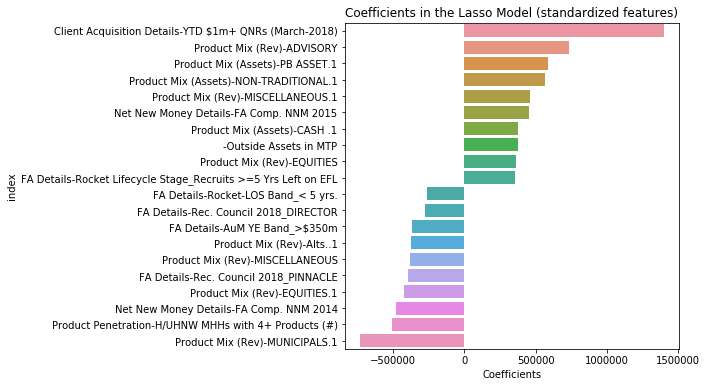

In [50]:
# Model training with standardized features and cross validation

from sklearn.preprocessing import StandardScaler

# Scale data
standard_scaler = StandardScaler()
X_out_s = standard_scaler.fit_transform(X_out)
X_out_s_df = pd.DataFrame(X_out, columns = X_out.columns)

from sklearn.linear_model import LassoCV

reg_out = LassoCV(cv=5, alphas=[10, 20], random_state=0).fit(X_out_s, y_out)

# Create dataframe of features and their respective coefficients
coef = pd.DataFrame(reg_out.coef_, index = X_out_s_df.columns)
coef.columns = ['Coefficients']
coef.sort_values(by='Coefficients', ascending=False, inplace=True)

# Filter most positive and negative coefficients
coef_plot = pd.concat([coef.head(10), coef.tail(10)])

# Plot 
a1_dims = (6, 6)
fig, ax = plt.subplots(figsize=a1_dims)
plt.title("Coefficients in the Lasso Model (standardized features)")
sns.barplot(y='index', x='Coefficients', data=coef_plot.reset_index(), ax=ax)

In [52]:
# Selecting top features

coef_standardized_abs = coef.reindex(coef.Coefficients.abs().sort_values(ascending=False).index)
coef_standardized_selected = coef_standardized_abs.head(20).reset_index()
coef_standardized_selected.columns = ['Feature', 'Important']
coef_standardized_selected.loc[:, 'Important'] = 1
coef_standardized_selected

,Feature,Important
0,Client Acquisition Details-YTD $1m+ QNRs (Marc...,1
1,Product Mix (Rev)-MUNICIPALS.1,1
2,Product Mix (Rev)-ADVISORY,1
3,Product Mix (Assets)-PB ASSET.1,1
4,Product Mix (Assets)-NON-TRADITIONAL.1,1
5,Product Penetration-H/UHNW MHHs with 4+ Produc...,1
6,Net New Money Details-FA Comp. NNM 2014,1
7,Product Mix (Rev)-MISCELLANEOUS.1,1
8,Net New Money Details-FA Comp. NNM 2015,1
9,Product Mix (Rev)-EQUITIES.1,1


# Using Lasso Model with normalisation

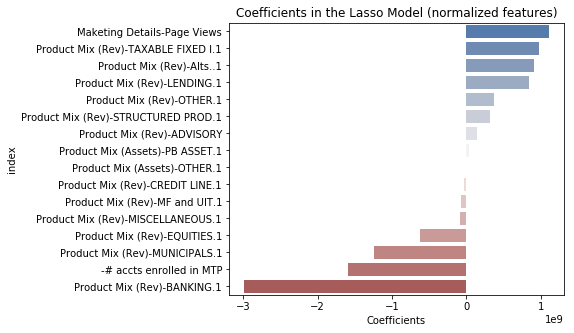

In [53]:
# Model training with normalized features and cross validation

from sklearn import preprocessing

# normalize the data attributes
X_nor = preprocessing.normalize(X_out)
X_nor_df = pd.DataFrame(X_out, columns = X_out.columns)


# Find coefficients and alphas with cross-validation
reg_nor = LassoCV(cv=5, alphas=[0.01, 0.1], random_state=0).fit(X_nor, y_out)


# Create dataframe of features and their respective coefficients
coef_nor = pd.DataFrame(reg_nor.coef_, index = X_nor_df.columns)
coef_nor.columns = ['Coefficients'] # Add column name
coef_nor.sort_values(by='Coefficients', ascending=False, inplace=True) # Sort coefficients from positive to negative

# Filter most positive and negative coefficients
coef_nor_plot = pd.concat([coef_nor.head(8), coef_nor.tail(8)])

# Plot 
a2_dims = (6, 5)
fig, ax = plt.subplots(figsize=a2_dims)
lasso_n = sns.barplot(y='index', x='Coefficients', data=coef_nor_plot.reset_index(), ax=ax, palette='vlag')
plt.title("Coefficients in the Lasso Model (normalized features)")
fig = lasso_n.get_figure()
fig.savefig('lasso_n.png') 

In [54]:
# Selecting top features
coef_normalized_abs = coef_nor.reindex(coef_nor.Coefficients.abs().sort_values(ascending=False).index)
coef_normalized_abs.head(10)

coef_normalized_selected = coef_normalized_abs.head(10).reset_index()
coef_normalized_selected.columns = ['Feature', 'Important']
coef_normalized_selected.loc[:, 'Important'] = 1
coef_normalized_selected

,Feature,Important
0,Product Mix (Rev)-BANKING.1,1
1,-# accts enrolled in MTP,1
2,Product Mix (Rev)-MUNICIPALS.1,1
3,Maketing Details-Page Views,1
4,Product Mix (Rev)-TAXABLE FIXED I.1,1
5,Product Mix (Rev)-Alts..1,1
6,Product Mix (Rev)-LENDING.1,1
7,Product Mix (Rev)-EQUITIES.1,1
8,Product Mix (Rev)-OTHER.1,1
9,Product Mix (Rev)-STRUCTURED PROD.1,1


# Using recursive feature elimination model

Recursive feature elimination is based on the idea to repeatedly construct a model (for example a linear regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. We will use Sklearn which provides RFE for recursive feature elimination and RFECV for finding the ranks together with optimal number of features via a cross validation loop.

In [55]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression() 
rfecv_lr = RFECV(estimator=reg_lr, step=1, cv=5,scoring='neg_mean_absolute_error')   #5-fold cross-validation


rfecv_lr = rfecv_lr.fit(X_out, y_out) # We can use the unscale features


print('Optimal number of features :', rfecv_lr.n_features_)
print('Best features :', X_out.columns[rfecv_lr.support_])

Optimal number of features : 11
Best features : Index(['Product Mix (Rev)-Alts.', 'Product Mix (Rev)-LENDING',
       'Product Mix (Rev)-MUNICIPALS', 'Product Mix (Rev)-TAXABLE FIXED I',
       'Product Mix (Assets)-COMMODITIES',
       'Product Mix (Assets)-NON-TRADITIONAL', 'Product Mix (Assets)-PB ASSET',
       'Client Acquisition Details-YTD $1m+ QNRs (March-2018)',
       'Net New Money Details-Magnitude of 2017 Growth', '-% of MHHs on MTP',
       'Banking and Lending-SBL: H/UHNW MHHs Utilized CLs (%)'],
      dtype='object')


In [56]:
# Storing the important features in a dataframe

index = ['Product Mix (Rev)-Alts.',
         'Product Mix (Rev)-LENDING',
         'Product Mix (Rev)-MUNICIPALS',
         'Product Mix (Rev)-TAXABLE FIXED I',
         'Product Mix (Assets)-COMMODITIES',
         'Product Mix (Assets)-NON-TRADITIONAL',
         'Product Mix (Assets)-PB ASSET',
         'Client Acquisition Details-YTD $1m+ QNRs (March-2018)',
         'Net New Money Details-Magnitude of 2017 Growth',
         '-% of MHHs on MTP',
         'Banking and Lending-SBL: H/UHNW MHHs Utilized CLs (%)']
columns = ['Important'] # Important features labeled as 1
imp_rfe_selected = pd.DataFrame(index=index, columns=columns)
imp_rfe_selected = imp_rfe_selected.fillna(1).reset_index()
imp_rfe_selected.columns = ['Feature', 'Important']

In [57]:
imp_rfe_selected

,Feature,Important
0,Product Mix (Rev)-Alts.,1
1,Product Mix (Rev)-LENDING,1
2,Product Mix (Rev)-MUNICIPALS,1
3,Product Mix (Rev)-TAXABLE FIXED I,1
4,Product Mix (Assets)-COMMODITIES,1
5,Product Mix (Assets)-NON-TRADITIONAL,1
6,Product Mix (Assets)-PB ASSET,1
7,Client Acquisition Details-YTD $1m+ QNRs (Marc...,1
8,Net New Money Details-Magnitude of 2017 Growth,1
9,-% of MHHs on MTP,1


# Using Stability model 
Stability selection is based on subsampling in combination with selection algorithm. The idea is to apply a feature selection algorithm on different subsets of data and with different subsets of features. After repeating the process a number of times, it checks how many times a feature ended up being selected as important when it was in a feature subset. We can expect strong features to have scores close to 100%, since they are always selected when possible. Weaker, but still relevant features will also have non-zero scores, since they would be selected when stronger features are not present in the currently selected subset. We will use Sklearn which implements stability selection in the randomized lasso regression classes.

In [58]:
# Model training

from sklearn.linear_model import RandomizedLasso

#Data gets scaled automatically by sklearn's implementation
names = list(df_new.columns)
 
rlasso = RandomizedLasso()
rlasso.fit(X_out, y_out)

imp_sta_dict = dict(zip(names, (rlasso.scores_)))

print('finished')

/home/siddharth/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [59]:
# important features

imp_sta = pd.DataFrame.from_dict(imp_sta_dict, orient='index')
imp_sta.columns = ["Importance"]
imp_sta.sort_values(by='Importance', ascending=False, inplace=True)
imp_sta

,Importance
Client Acquisition Details-YTD $1m+ QNRs (March-2018),1.000
Net New Money Details-FA Comp. NNM 2015,1.000
Net New Money Details-FA Comp. NNM 2016,0.995
Product Mix (Rev)-MUNICIPALS.1,0.960
Product Mix (Rev)-ADVISORY,0.925
Net New Money Details-FA Comp. NNM 2014,0.920
-# accts enrolled in MTP,0.885
Net New Money Details-FA Comp. NNM 2017,0.870
Product Mix (Rev)-EQUITIES.1,0.870
Product Mix (Assets)-PB ASSET.1,0.835


Text(0.5,1,'Feature importance in the Stability Model')

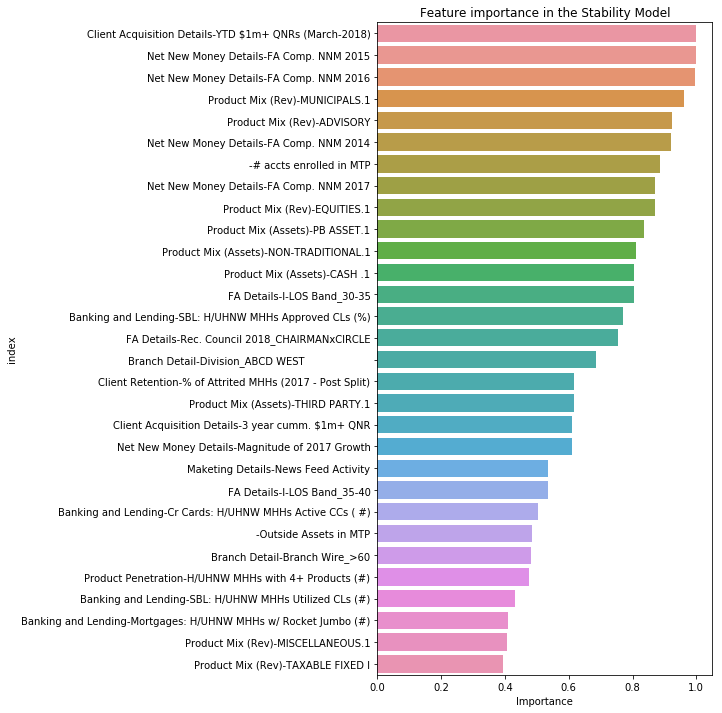

In [60]:
# Plotting of important features

a4_dims = (6, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='index', x='Importance', data=imp_sta.head(30).reset_index(), ax=ax)
plt.title("Feature importance in the Stability Model")

In [61]:
# Important features

imp_sta_selected = imp_sta.head(20).reset_index()
imp_sta_selected.columns = ['Feature', 'Important']
imp_sta_selected.loc[:, 'Important'] = 1
imp_sta_selected

,Feature,Important
0,Client Acquisition Details-YTD $1m+ QNRs (Marc...,1
1,Net New Money Details-FA Comp. NNM 2015,1
2,Net New Money Details-FA Comp. NNM 2016,1
3,Product Mix (Rev)-MUNICIPALS.1,1
4,Product Mix (Rev)-ADVISORY,1
5,Net New Money Details-FA Comp. NNM 2014,1
6,-# accts enrolled in MTP,1
7,Net New Money Details-FA Comp. NNM 2017,1
8,Product Mix (Rev)-EQUITIES.1,1
9,Product Mix (Assets)-PB ASSET.1,1


# Using Random Forest Model
Random forest is a tree-based method which can evaluate nonlinear feature interactions. So we will compute feature importance using this model to complement the selections based on linear models. Random forest uses impurity based ranking to select top performing features.

In [62]:
# model training 

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

#thit is how we get the feature importance with simple steps:
reg_rf = reg_rf.fit(X_out, y_out)
# display the relative importance of each attribute
importances = reg_rf.feature_importances_


imp_rf_dict = dict(zip(names, importances))

print('Finished')

Finished


In [63]:
# important feature

imp_rf = pd.DataFrame.from_dict(imp_rf_dict, orient='index')
imp_rf.columns = ["Importance"]
imp_rf = imp_rf.sort_values(by='Importance', ascending=False)
imp_rf

,Importance
Client Acquisition Details-YTD $1m+ QNRs (March-2018),0.086475
Product Mix (Assets)-EQUITY.1,0.063417
Product Mix (Assets)-CASH .1,0.057094
Net New Money Details-FA Comp. NNM 2017,0.042445
Net New Money Details-FA Comp. NNM 2016,0.030995
Net New Money Details-FA Comp. NNM 2015,0.029305
Product Mix (Rev)-CREDIT LINE.1,0.026650
Net New Money Details-FA Comp. NNM 2014,0.024464
Product Mix (Rev)-EQUITIES.1,0.021926
Product Mix (Assets)-CASH,0.019618


Text(0.5,1,'Feature importance in the Random Forest Model')

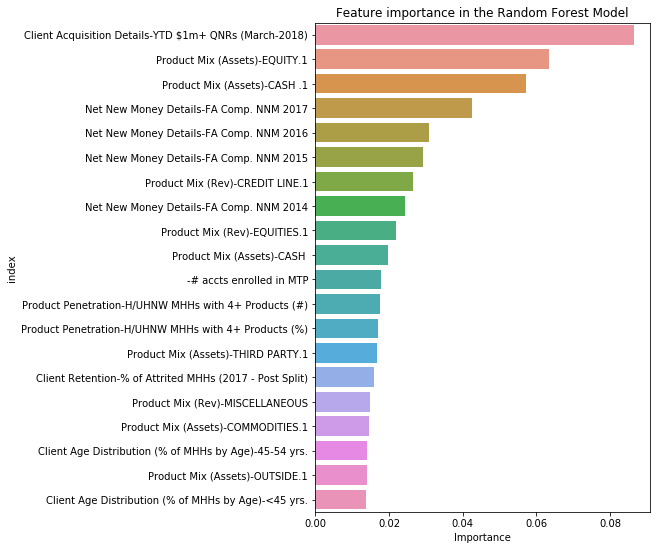

In [64]:
# Plotting of features

a5_dims = (6, 9)
fig, ax = plt.subplots(figsize=a5_dims)
sns.barplot(y='index', x='Importance', data=imp_rf.head(20).reset_index(), ax=ax)
plt.title("Feature importance in the Random Forest Model")

In [65]:
# selected features

imp_rf_selected = imp_rf.head(20).reset_index()
imp_rf_selected.columns = ['Feature', 'Important']
imp_rf_selected.loc[:, 'Important'] = 1
imp_rf_selected

,Feature,Important
0,Client Acquisition Details-YTD $1m+ QNRs (Marc...,1
1,Product Mix (Assets)-EQUITY.1,1
2,Product Mix (Assets)-CASH .1,1
3,Net New Money Details-FA Comp. NNM 2017,1
4,Net New Money Details-FA Comp. NNM 2016,1
5,Net New Money Details-FA Comp. NNM 2015,1
6,Product Mix (Rev)-CREDIT LINE.1,1
7,Net New Money Details-FA Comp. NNM 2014,1
8,Product Mix (Rev)-EQUITIES.1,1
9,Product Mix (Assets)-CASH,1


# Using all models to detemine the final list of best features

To select the top performing features for improving the generalization of a model, we will find the features in the Lasso, recursive feature elimination, and stability models, which all involve a linear process. And we will group these features together (group 1). Then we will find the features that are common in group 1 and tree-based random forest model. These features will be the top performing features. To have a sense of how these features really impact the target, we will build a linear model using these features.

In [66]:
# Features in non tree based model

feature_nontree = pd.concat([coef_standardized_selected, coef_normalized_selected, imp_rfe_selected, imp_sta_selected])

features_nontree_duplicated = feature_nontree[feature_nontree.duplicated()].drop_duplicates()

In [69]:
# Features which are duplicated in non tree models

features_nontree_duplicated_list = features_nontree_duplicated['Feature'].tolist()
features_nontree_duplicated_list

['Product Mix (Rev)-MUNICIPALS.1',
 'Product Mix (Rev)-Alts..1',
 'Product Mix (Rev)-EQUITIES.1',
 'Product Mix (Rev)-MUNICIPALS',
 'Client Acquisition Details-YTD $1m+ QNRs (March-2018)',
 'Net New Money Details-FA Comp. NNM 2015',
 'Net New Money Details-FA Comp. NNM 2016',
 'Product Mix (Rev)-ADVISORY',
 'Net New Money Details-FA Comp. NNM 2014',
 '-# accts enrolled in MTP',
 'Product Mix (Assets)-PB ASSET.1',
 'Product Mix (Assets)-NON-TRADITIONAL.1',
 'Product Mix (Assets)-CASH .1',
 'Net New Money Details-Magnitude of 2017 Growth']

In [70]:
# Features present in both tree and non-tree based models

feature_common_lr_tree = pd.merge(features_nontree_duplicated, imp_rf_selected, how='inner', on=['Feature'])
feature_common_lr_tree
feature_common_lr_tree_list = feature_common_lr_tree['Feature'].tolist()
feature_common_lr_tree_list

['Product Mix (Rev)-EQUITIES.1',
 'Client Acquisition Details-YTD $1m+ QNRs (March-2018)',
 'Net New Money Details-FA Comp. NNM 2015',
 'Net New Money Details-FA Comp. NNM 2016',
 'Net New Money Details-FA Comp. NNM 2014',
 '-# accts enrolled in MTP',
 'Product Mix (Assets)-CASH .1']

# Using decision tree model with all the important features to get to the best features

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(criterion='mae')

    params = {'max_depth': list(range(3, 6))}
    
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_absolute_error', cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

/home/siddharth/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/siddharth/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [72]:
X_tree_all = pd.concat([coef_standardized_selected, 
                        coef_normalized_selected, 
                        imp_sta_selected, 
                        imp_rf_selected, 
                        imp_rfe_selected])

X_tree_all.drop_duplicates(inplace=True)

X_tree_all_list = X_tree_all['Feature'].tolist()

In [73]:
X_tree_woNNM_list = [f for f in X_tree_all_list 
                       if f not in ('Net New Money Details-FA Comp. NNM 2014', 
                                    'Net New Money Details-FA Comp. NNM 2015',
                                    'Net New Money Details-FA Comp. NNM 2016',
                                    'Net New Money Details-FA Comp. NNM 2017',
                                    'Net New Money Details-Magnitude of 2017 Growth',
                                    'Net New Money Details-Rate of Increase / decrease')]

In [74]:
# Use the most important features

X_tree_final = X_out[X_out.columns.intersection(X_tree_woNNM_list)]

# Fit the training data to the model using grid search
reg_tree = fit_model(X_tree_final, y_out)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg_tree.get_params()['max_depth']))

Parameter 'max_depth' is 3 for the optimal model.


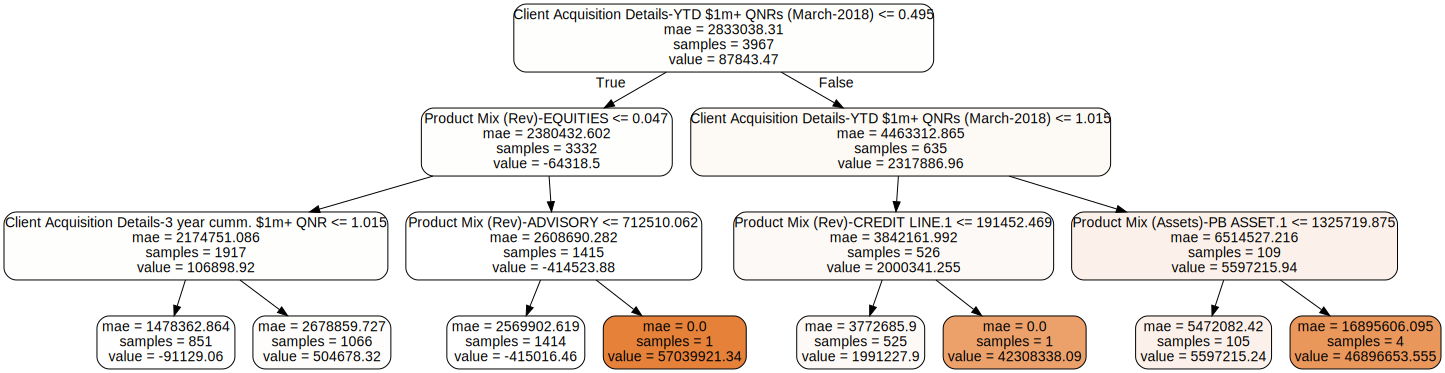

In [81]:
# visualizing the decision tree via tree structure
from sklearn import tree
from graphviz import Source
from IPython.display import display
from IPython.display import SVG

graph = Source(tree.export_graphviz(reg_tree, 
                                    out_file=None,
                                    feature_names=X_tree_final.columns,
                                    filled = True,
                                    rounded=True))
               
display(SVG(graph.pipe(format='svg')))

In [82]:
# Save image
import pydotplus

graph1 = tree.export_graphviz(reg_tree, 
                              out_file=None,
                              feature_names=X_tree_final.columns,
                              filled = True,
                              rounded=True)

graph1 = pydotplus.graph_from_dot_data(graph1)
graph1.write_png('tree1.png')

True

In [80]:
# Building tree with more levels

def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    regressor = DecisionTreeRegressor(criterion='mae')
    params = {'max_depth': list(range(10, 15))}
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring='neg_mean_absolute_error', cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


reg_tree2 = fit_model(X_tree_final, y_out)


In [83]:
# Save image
graph2 = tree.export_graphviz(reg_tree2, 
                              out_file=None,
                              feature_names=X_tree_final.columns,
                              filled = True,
                              rounded=True)

graph2 = pydotplus.graph_from_dot_data(graph2)
graph2.write_png('tree2.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.970098 to fit



True